In [1]:
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
sys.path.append("C:/dev/pycmqlib3/")
sys.path.append("C:/dev/pycmqlib3/misc_scripts/")

import misc
import data_handler as dh
import plotly_examples
import backtest
%matplotlib inline

In [2]:
start = datetime.date(2016, 1, 1)
end = datetime.date(2020, 5, 20)
need_shift = 1
asset = 'i'
freq = 'd'
args = {'n': 1, 'roll_rule': '-35b', 'freq': freq, 'need_shift': need_shift}
args['start_date'] = start
args['end_date'] = end
win_ratio_s = 0.35
win_ratio_l = 2.0
win_m = 26
df = misc.nearby(asset, **args)
kumo_cloud = dh.KUMO_CLOUD(df, n = win_m, short_ratio = win_ratio_s, long_ratio = win_ratio_l)
for key in kumo_cloud.columns:
    df[key] = kumo_cloud[key]
#plotly_examples.plot_ichimoku_cloud(df, win_m)

In [17]:
start = datetime.date(2016, 1, 1)
end = datetime.date(2020, 5, 20)
need_shift = 1
asset = 'i'
freq = 'm'
args = {'n': 1, 'roll_rule': '-35b', 'freq': freq, 'need_shift': need_shift}
args['start_date'] = start
args['end_date'] = end
mdf = misc.nearby(asset, **args)
mdf = misc.cleanup_mindata(mdf, asset)
print(mdf[-5:])

                    instID exch        date  min_id   open   high    low  \
datetime                                                                   
2020-05-20 14:55:00  i2009  DCE  2020-05-20    2055  707.0  707.0  705.5   
2020-05-20 14:56:00  i2009  DCE  2020-05-20    2056  705.5  706.0  705.0   
2020-05-20 14:57:00  i2009  DCE  2020-05-20    2057  705.0  705.5  705.0   
2020-05-20 14:58:00  i2009  DCE  2020-05-20    2058  705.0  706.0  705.0   
2020-05-20 14:59:00  i2009  DCE  2020-05-20    2059  705.5  706.0  704.5   

                     close  volume  openInterest contract  shift  
datetime                                                          
2020-05-20 14:55:00  705.5  3962.0      898269.0    i2009    0.0  
2020-05-20 14:56:00  705.0  2750.0      897671.0    i2009    0.0  
2020-05-20 14:57:00  705.0  3569.0      896598.0    i2009    0.0  
2020-05-20 14:58:00  705.5  2759.0      895804.0    i2009    0.0  
2020-05-20 14:59:00  704.5  8709.0      894381.0    i2009    0.0 

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
df = dh.conv_ohlc_freq1(mdf, '3m')
#df = mdf.copy()
#df = dh.day_split1(mdf, [300, 1500, 1930, 2100])
win_ratio_s = 0.35
win_ratio_l = 2.0
win_m = 80
win_s = round(win_ratio_s * win_m)
win_l = round(win_ratio_l * win_m)

kumo_cloud = dh.KUMO_CLOUD(df, n = win_m, short_ratio = win_ratio_s, long_ratio = win_ratio_l)

df['KUMO_TK'] = kumo_cloud['KUMO_TK_%s' % str(win_m)]
df['KUMO_KJ'] = kumo_cloud['KUMO_KJ_%s' % str(win_m)]
df['KUMO_SKA'] = kumo_cloud['KUMO_SKA_%s' % str(win_m)].shift(win_m)
df['KUMO_SKB'] = kumo_cloud['KUMO_SKB_%s' % str(win_m)].shift(win_m)
# The most current closing price plotted 26 time periods behind (optional)
df['KUMO_CK'] = df['close'].shift(-win_m)
print(df[-5:])
#plotly_examples.plot_ichimoku_cloud(df, win_s, win_m, win_l)

                           date instID exch  min_id   open   high    low  \
datetime                                                                   
2020-05-20 14:45:00  2020-05-20  i2009  DCE    2047  705.5  707.5  705.5   
2020-05-20 14:48:00  2020-05-20  i2009  DCE    2050  707.5  707.5  706.5   
2020-05-20 14:51:00  2020-05-20  i2009  DCE    2053  707.5  707.5  706.5   
2020-05-20 14:54:00  2020-05-20  i2009  DCE    2056  706.5  707.0  705.0   
2020-05-20 14:57:00  2020-05-20  i2009  DCE    2059  705.0  706.0  704.5   

                     close   volume  openInterest contract  shift  KUMO_TK  \
datetime                                                                     
2020-05-20 14:45:00  707.0   9812.0      903821.0    i2009    0.0   706.25   
2020-05-20 14:48:00  707.5   6142.0      900468.0    i2009    0.0   706.25   
2020-05-20 14:51:00  706.5   2858.0      899256.0    i2009    0.0   706.25   
2020-05-20 14:54:00  705.0   7581.0      897671.0    i2009    0.0   705.75   

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



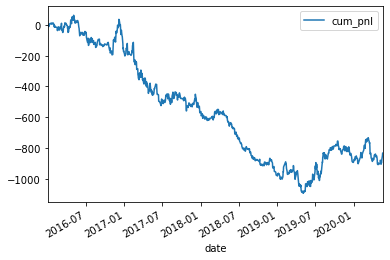

                              0
avg_pnl_1y             0.800000
avg_pnl_2y            -0.366530
avg_pnl_3y            -0.523288
avg_pnl_4y            -0.883350
max_dd_period_1y     -48.000000
max_dd_period_2y    -346.000000
max_dd_period_3y    -704.000000
max_dd_period_4y    -880.000000
max_drawdown_1y     -174.000000
max_drawdown_2y     -459.000000
max_drawdown_3y     -709.500000
max_drawdown_4y    -1130.000000
num_days_1y          245.000000
num_days_2y          487.000000
num_days_3y          730.000000
num_days_4y          973.000000
profit_dd_ratio_1y     1.126437
profit_dd_ratio_2y    -0.388889
profit_dd_ratio_3y    -0.538407
profit_dd_ratio_4y    -0.760619
sharp_ratio_1y         0.860262
sharp_ratio_2y        -0.452579
sharp_ratio_3y        -0.655979
sharp_ratio_4y        -1.013334
std_pnl_1y            14.762491
std_pnl_2y            12.856267
std_pnl_3y            12.663423
std_pnl_4y            13.838241
tot_cost_1y          234.500000
tot_cost_2y          618.500000
tot_cost

In [19]:
margin_rate = [0.08, 0.08]
pnl_tenors = ['1y', '2y', '3y', '4y']
cost_ratio = 1.0
offset = 0.5
start_capital = 0.0

long_signal = pd.Series(np.nan, index = df.index)
long_flag = (df['close'] > df['KUMO_SKA']) & (df['close'] > df['KUMO_SKB']) \
            #& (df['KUMO_TK'] >= df['KUMO_SKA']) & (df['KUMO_TK'] >= df['KUMO_SKB'])                         
long_signal[long_flag] = 1
cover_flag = ((df['close'] <= df['KUMO_SKA']) & (df['close'] <= df['KUMO_SKB'])) \
            #| ((df['KUMO_TK'] <= df['KUMO_SKA']) & (df['KUMO_TK'] <= df['KUMO_SKB']))
long_signal[cover_flag] = 0
long_signal = long_signal.shift(1).fillna(method='ffill').fillna(0)
short_signal = pd.Series(np.nan, index = df.index)
short_flag = (df['close'] < df['KUMO_SKA']) & (df['close'] < df['KUMO_SKB']) \
            #& (df['KUMO_TK'] <= df['KUMO_SKA']) & (df['KUMO_TK'] <= df['KUMO_SKB'])             
short_signal[short_flag] = -1
cover_flag = ((df['close'] >= df['KUMO_SKA']) & (df['close'] >= df['KUMO_SKB'])) \
            #| ((df['KUMO_TK'] >= df['KUMO_SKA']) & (df['KUMO_TK'] >= df['KUMO_SKB']))
short_signal[cover_flag] = 0
short_signal = short_signal.shift(1).fillna(method='ffill').fillna(0)
df['pos'] = (long_signal + short_signal)
df['pos'][-1] = 0.0
df['cost'] = abs(df['pos'] - df['pos'].shift(1)) * offset
df['cost'] = df['cost'].fillna(0.0)
df['traded_price'] = df.open
closed_trades = backtest.simdf_to_trades1(df, slippage = offset)
res_trade = backtest.get_trade_stats(closed_trades)
(res_pnl, ts) = backtest.get_pnl_stats([df], margin_rate, 'm', tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
ts[['cum_pnl']].plot()
plt.show()
pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(pnl_df)